In [1]:
from tensorflow import keras
from PIL import Image

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os, glob

# 1. 데이터 전처리

## 1.1 Image resize

In [2]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    target_size=(28,28)
    
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), " images resized.")


image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

840  images resized.
840  images resized.
840  images resized.


In [11]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

124  images resized.
124  images resized.
124  images resized.


## 1.2 Labeling

In [3]:
def load_data(img_path, number_of_data=2520):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 2520 입니다.
x_train shape: (2520, 28, 28, 3)
y_train shape: (2520,)


## 1.3 Check train data set

라벨:  0


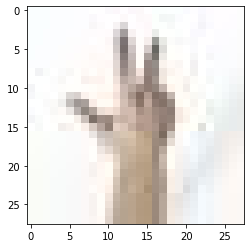

In [4]:
plt.imshow(x_train[1])
print('라벨: ', y_train[1])

# 2. Model design

In [19]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                51264     
_________________________________________________________________
dense_9 (Dense)              (

# 3. Model train

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
79/79 [==============================] - 1s 3ms/step - loss: 10.6818 - accuracy: 0.5549
Epoch 2/5
79/79 [==============================] - 0s 3ms/step - loss: 0.0631 - accuracy: 0.9769
Epoch 3/5
79/79 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9984
Epoch 4/5
79/79 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.9997
Epoch 5/5
79/79 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000


# 4. Model test

In [21]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 372)
x_test_norm = x_test/255.0

print("x_train shape: {}".format(x_test_norm.shape))
print("y_train shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 372 입니다.
x_train shape: (372, 28, 28, 3)
y_train shape: (372,)


In [22]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

12/12 - 0s - loss: 1.0799 - accuracy: 0.6909
test_loss: 1.0799272060394287 
test_accuracy: 0.6908602118492126


# 5. model analysis

model.predict() 결과 :  [0.33948216 0.32487902 0.33563882]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


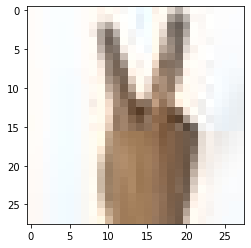

In [24]:
predicted_result = model.predict(x_test_norm)
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [0.33015165 0.3371007  0.33274767]
라벨: 2, 예측결과: 1


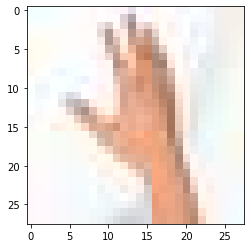

예측확률분포: [0.33266702 0.33392158 0.33341146]
라벨: 2, 예측결과: 1


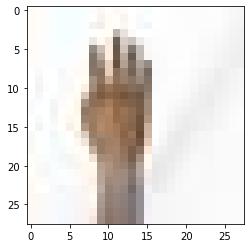

예측확률분포: [0.3302717 0.3317405 0.3379878]
라벨: 0, 예측결과: 2


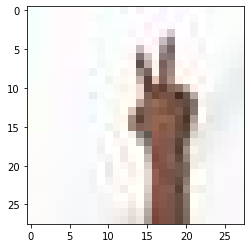

예측확률분포: [0.32909858 0.33614397 0.33475742]
라벨: 2, 예측결과: 1


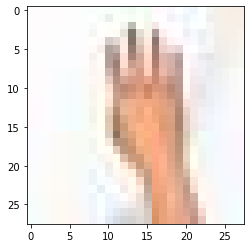

예측확률분포: [0.32981637 0.3370677  0.33311597]
라벨: 2, 예측결과: 1


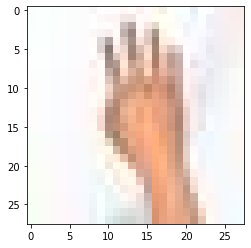

In [25]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# 6. 모델 개선 - hyper parameter setting

In [35]:
n_channel_1=8
n_channel_2=16
n_dense=16
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(x_train, y_train, epochs=n_train_epoch)

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 8)         224       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 16)                6416      
_________________________________________________________________
dense_29 (Dense)             (None, 10)              

# 후기 - # 프로젝트를 진행하면서 삽질한 것을 기록합니다

## 웹캠 데이터로 모델 학습을 진행하면,  훈련용 데이터 개수가 너무 적어 학습이 제대로 되지 않음.

## 학습 결과 Loss는 0.02 ~ 0.01로 매우 낮으나, 정확도가 0.34~0.37밖에 되지 않음.
## 검증 결과 Loss는 1.9, 정확도는 0.25 ~ 0.31 수준.
## ☆ 쓸 수 없는 모델 완성 ☆

## 그래서 [링크](https://laurencemoroney.com/datasets.html) 의 데이터 셋을 사용하기로 함.
# 
## 위 링크에서 가져온 데이터 셋으로 시도한 결과 아래와 같은 삽질이 시작됨.

### 1. 이미지 사이즈 변경을 시도하면 이미지가 깨지거나 변환이 안됨
###    -> PNG 파일은 투명도(Alpha) 값이 있어 4차원 배열임. 그래서 3차원(RGB)로 변환 불가능
###    -> 그래서 python으로 확장자를 png to jpeg로 convert 후 저장 시도.
###    -> 어림도 없다. 터짐. [ OSError: cannot write mode RGBA as JPEG ]
###    -> 결국 윈도우에서 확장자를 모두 변환해주니 잘 됨
# 
### 2. 하이퍼 파라미터 값에 따라 성능이 달라짐.
###    -> 위 모델에서 Conv2D의 채널 값은 32 이하일 때 값이 잘 나왔음
###    -> 잘 정제된 데이터와 분류 개수가 적어서 그런듯 하다.
###    -> 정교한 분류가 필요하면 값을 높게, 간단한 분류시 값을 낮게.
###    -> 값 부여시 2의 제곱으로 할것.  왜냐하면 행렬 곱셈을 하기 때문. ex) 2,4,8,16,...
###    -> Dance는 어떤 활성화 함수를 쓰냐에 따라 적절한 값이 달라짐.
###    -> 어떤 값을 줘야하는지 궁금하다면 activation 파라미터의 함수 종류를 먼저 보자.